In [1]:
!pwd
!ls

/content
drive  sample_data


In [4]:
from google.colab import drive
drive.mount('/content/drive')
%cd ..
%cd /content/drive/MyDrive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/
/content/drive/MyDrive


#Import Library

In [5]:

# Importing Libraries :
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.model_selection import cross_val_score, GridSearchCV,train_test_split
from sklearn.metrics import confusion_matrix,classification_report


from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier



#Importing Data

In [6]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Tree_Inventory.csv")
df.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (22) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Editing,Botanical Name,Common Name,DBH,Total Yearly Eco Benefits ($),Stormwater Benefits ($),Stormwater Gallons Saved,Greenhouse CO2 Benefits ($),CO2 Avoided (in lbs.),CO2 Sequestered (in lbs.),...,Address,Street,Side,Site,Council District,Park Name,Latitude,Longitude,Site ID,Location
0,Olmsted,VACANT,VACANT,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,414,Parkside Av,In_Lot,1,Delaware,Delaware,42.935132,-78.865680,128252,"(42.9351320796352, -78.8656797130341)"
1,Olmsted,VACANT,VACANT,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,414,Parkside Av,In_Lot,1,Delaware,Delaware,42.934818,-78.865734,101506,"(42.9348179512101, -78.8657343078733)"
2,Buffalo,VACANT,VACANT,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,19,Leamington Pl,Front,1,South,0,42.862745,-78.818944,120504,"(42.8627450797528, -78.818943987467)"
3,Buffalo,TILIA X EUCHLORA,"LINDEN, CRIMEAN",12.0,121.50,2.94,366.88,0.08,13.81,12.10,...,152,University Av,Front,1,University,0,42.956795,-78.826980,70873,"(42.9567948909031, -78.8269801142854)"
4,Buffalo,CORNUS SPP,"DOGWOOD, SPECIES",5.0,26.21,0.62,77.05,0.02,3.55,3.05,...,4,Rumsey Rd,Side,1,Delaware,0,42.928253,-78.868774,17819,"(42.9282527482982, -78.8687744932041)"


In [7]:
df.describe()

,DBH,Total Yearly Eco Benefits ($),Stormwater Benefits ($),Stormwater Gallons Saved,Greenhouse CO2 Benefits ($),CO2 Avoided (in lbs.),CO2 Sequestered (in lbs.),Energy Benefits ($),kWh Saved,Therms Saved,Air Quality Benefits ($),Pollutants Saved (in lbs.),Property Benefits ($),Leaf Surface Area (in sq. ft.),Address,Site,Latitude,Longitude,Site ID
count,133076.000000,133076.000000,133076.000000,133076.000000,133076.000000,133076.000000,133076.000000,133076.000000,133076.000000,133076.000000,133076.000000,133076.000000,133076.000000,133076.000000,133076.000000,133076.000000,133076.000000,133076.000000,133076.000000
mean,7.348271,58.124375,3.779074,472.383358,0.280454,54.166167,42.648318,26.164380,39.886852,14.613730,2.360147,0.377142,25.540550,42.448133,1260.233280,1.431806,42.908858,-78.846756,66596.740209
std,10.116663,76.554034,7.324389,915.533047,0.630506,114.385772,109.687729,36.343385,58.253358,20.042207,4.766402,0.762365,34.081208,56.642449,29251.460258,4.131278,0.122267,0.218182,38445.871026
min,-3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-78.911907,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,75.000000,1.000000,42.890985,-78.871430,33308.750000
50%,2.000000,15.350000,0.240000,30.110000,0.010000,1.170000,0.770000,4.050000,4.910000,2.430000,0.090000,0.010000,8.990000,14.940000,179.000000,1.000000,42.913241,-78.846534,66595.500000
75%,13.000000,103.050000,4.260000,532.610000,0.160000,28.070000,21.770000,48.760000,72.390000,27.470000,1.820000,0.270000,46.970000,78.060000,414.000000,1.000000,42.936069,-78.821590,99871.250000
max,508.000000,469.300000,68.280000,8534.550000,7.600000,941.650000,1844.070000,170.640000,329.780000,88.380000,44.760000,6.370000,241.990000,402.180000,999999.000000,206.000000,42.965551,0.000000,135394.000000


In [8]:
df.shape


(133076, 27)

In [9]:
df.isnull().sum()

Editing                           0
Botanical Name                    0
Common Name                       0
DBH                               0
Total Yearly Eco Benefits ($)     0
Stormwater Benefits ($)           0
Stormwater Gallons Saved          0
Greenhouse CO2 Benefits ($)       0
CO2 Avoided (in lbs.)             0
CO2 Sequestered (in lbs.)         0
Energy Benefits ($)               0
kWh Saved                         0
Therms Saved                      0
Air Quality Benefits ($)          0
Pollutants Saved (in lbs.)        0
Property Benefits ($)             0
Leaf Surface Area (in sq. ft.)    0
Address                           0
Street                            0
Side                              0
Site                              0
Council District                  0
Park Name                         0
Latitude                          0
Longitude                         0
Site ID                           0
Location                          1
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133076 entries, 0 to 133075
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Editing                         133076 non-null  object 
 1   Botanical Name                  133076 non-null  object 
 2   Common Name                     133076 non-null  object 
 3   DBH                             133076 non-null  float64
 4   Total Yearly Eco Benefits ($)   133076 non-null  float64
 5   Stormwater Benefits ($)         133076 non-null  float64
 6   Stormwater Gallons Saved        133076 non-null  float64
 7   Greenhouse CO2 Benefits ($)     133076 non-null  float64
 8   CO2 Avoided (in lbs.)           133076 non-null  float64
 9   CO2 Sequestered (in lbs.)       133076 non-null  float64
 10  Energy Benefits ($)             133076 non-null  float64
 11  kWh Saved                       133076 non-null  float64
 12  Therms Saved    

In [11]:
df['Common Name'].value_counts()[:30]

VACANT                         59679
MAPLE, NORWAY                   9106
LINDEN, LITTLELEAF              8530
MAPLE, SILVER                   4410
MAPLE, RED                      2398
MAPLE, HEDGE                    2322
STUMP                           2131
MAPLE, CRIMSON KING             1826
LILAC, IVORY SILK               1719
HONEYLOCUST                     1532
ELM, CHRISTINE BUISMAN          1529
CRABAPPLE                       1487
MAPLE, DEBORAH SCHWEDLER        1443
LONDON PLANETREE                1301
PEAR, CALLERY                   1287
OAK, SWAMP WHITE                1219
LINDEN, CRIMEAN                 1213
OAK, NORTHERN RED               1150
HORSECHESTNUT, COMMON           1148
KENTUCKY COFFEE TREE             844
HACKBERRY                        835
MAPLE, FREEMAN                   828
PINE, AUSTRIAN                   677
HAWTHORN, SPECIES                648
MAPLE, SUGAR                     611
LONDON PLANETREE, BLOODGOOD      534
CHERRY, SPECIES                  500
S

In [12]:
df["Common Name"].value_counts().tolist()[1:6]

[9106, 8530, 4410, 2398, 2322]

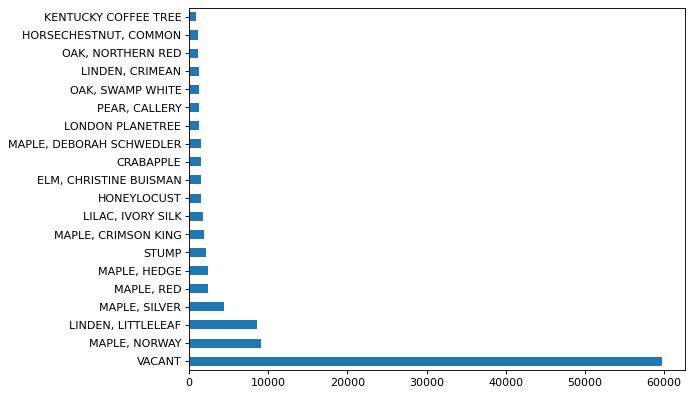

In [13]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
df['Common Name'].value_counts()[:20].plot(kind='barh')

In [14]:
data = df[(df['Common Name']=="HONEYLOCUST")|(df['Common Name']=="ELM, CHRISTINE BUISMAN")|(df['Common Name']=="CRABAPPLE")|(df['Common Name']=="MAPLE, DEBORAH SCHWEDLER")|(df['Common Name']=="LONDON PLANETREE")]
data=data.drop(['Editing', 'Botanical Name','DBH','Street','Side','Site','Council District','Park Name','Location'], axis=1)
print("dataset shape:", data.shape)
print("Column Name:", data.columns)

dataset shape: (7292, 18)
Column Name: Index(['Common Name', 'Total Yearly Eco Benefits ($)',
       'Stormwater Benefits ($)', 'Stormwater Gallons Saved',
       'Greenhouse CO2 Benefits ($)', 'CO2 Avoided (in lbs.)',
       'CO2 Sequestered (in lbs.)', 'Energy Benefits ($)', 'kWh Saved',
       'Therms Saved', 'Air Quality Benefits ($)',
       'Pollutants Saved (in lbs.)', 'Property Benefits ($)',
       'Leaf Surface Area (in sq. ft.)', 'Address', 'Latitude', 'Longitude',
       'Site ID'],
      dtype='object')


'CRABAPPLE','ELM, CHRISTINE BUISMAN','HONEYLOCUST','LONDON PLANETREE','MAPLE, DEBORAH SCHWEDLER'  these are the 5 Classes taken or classification.

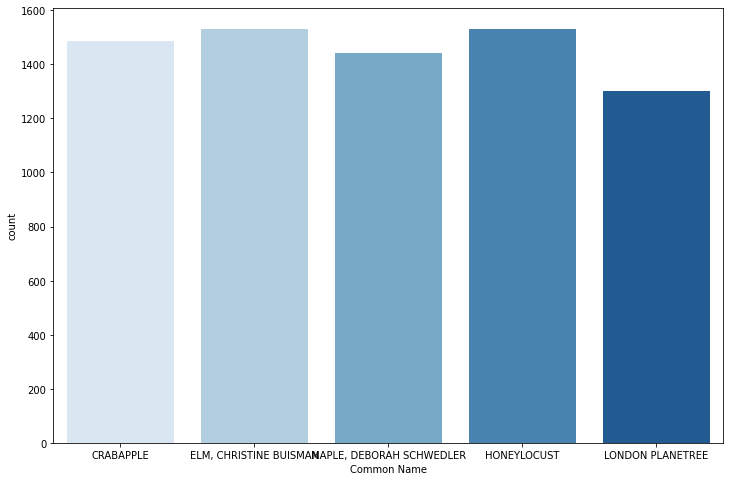

In [15]:
f=plt.figure(figsize=(12,8))
sns.countplot(x='Common Name',data=data, palette = 'Blues')
plt.show()

In [16]:
data['Common Name'].value_counts()

HONEYLOCUST                 1532
ELM, CHRISTINE BUISMAN      1529
CRABAPPLE                   1487
MAPLE, DEBORAH SCHWEDLER    1443
LONDON PLANETREE            1301
Name: Common Name, dtype: int64

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7292 entries, 7 to 133075
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Common Name                     7292 non-null   object 
 1   Total Yearly Eco Benefits ($)   7292 non-null   float64
 2   Stormwater Benefits ($)         7292 non-null   float64
 3   Stormwater Gallons Saved        7292 non-null   float64
 4   Greenhouse CO2 Benefits ($)     7292 non-null   float64
 5   CO2 Avoided (in lbs.)           7292 non-null   float64
 6   CO2 Sequestered (in lbs.)       7292 non-null   float64
 7   Energy Benefits ($)             7292 non-null   float64
 8   kWh Saved                       7292 non-null   float64
 9   Therms Saved                    7292 non-null   float64
 10  Air Quality Benefits ($)        7292 non-null   float64
 11  Pollutants Saved (in lbs.)      7292 non-null   float64
 12  Property Benefits ($)           

#Encoding


The target is Encided using Label Encoder

In [18]:
le = LabelEncoder()
data['Target']=le.fit_transform(data['Common Name'])
data=data.drop(['Common Name'],axis=1)

In [19]:
data.head()

,Total Yearly Eco Benefits ($),Stormwater Benefits ($),Stormwater Gallons Saved,Greenhouse CO2 Benefits ($),CO2 Avoided (in lbs.),CO2 Sequestered (in lbs.),Energy Benefits ($),kWh Saved,Therms Saved,Air Quality Benefits ($),Pollutants Saved (in lbs.),Property Benefits ($),Leaf Surface Area (in sq. ft.),Address,Latitude,Longitude,Site ID,Target
7,72.17,3.50,437.90,0.06,14.31,6.16,48.44,68.02,27.64,1.09,0.16,19.08,31.70,178,42.933901,-78.806923,124448,0
32,269.16,23.58,2947.21,2.13,418.57,382.31,108.55,169.83,60.20,17.15,2.75,117.75,195.69,801,42.925202,-78.880918,44826,1
91,78.85,3.75,469.24,0.42,75.86,71.33,36.85,50.48,21.15,3.27,0.53,34.55,57.41,617,42.948054,-78.804712,75821,4
98,264.57,24.35,3044.35,2.36,459.05,416.67,104.28,160.77,58.07,18.54,2.99,115.03,191.18,278,42.943924,-78.839314,63057,1
108,193.14,9.79,1223.18,0.14,38.27,14.75,113.48,181.91,62.49,3.00,0.42,66.74,110.92,104,42.942742,-78.860795,50444,2


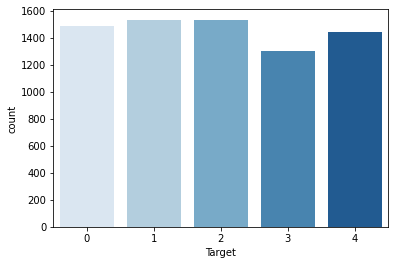

In [20]:
sns.countplot(x='Target',data=data, palette = 'Blues')
plt.show()

In [47]:
data['Target'].value_counts()

2    1532
1    1529
0    1487
4    1443
3    1301
Name: Target, dtype: int64

In [48]:
label=['CRABAPPLE','ELM, CHRISTINE BUISMAN','HONEYLOCUST','LONDON PLANETREE','MAPLE, DEBORAH SCHWEDLER']

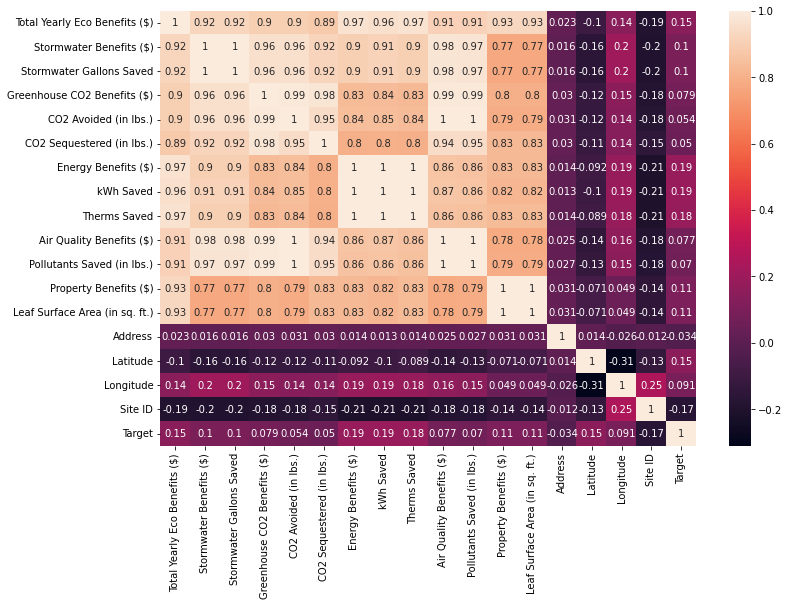

In [49]:
f=plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True)
plt.show()

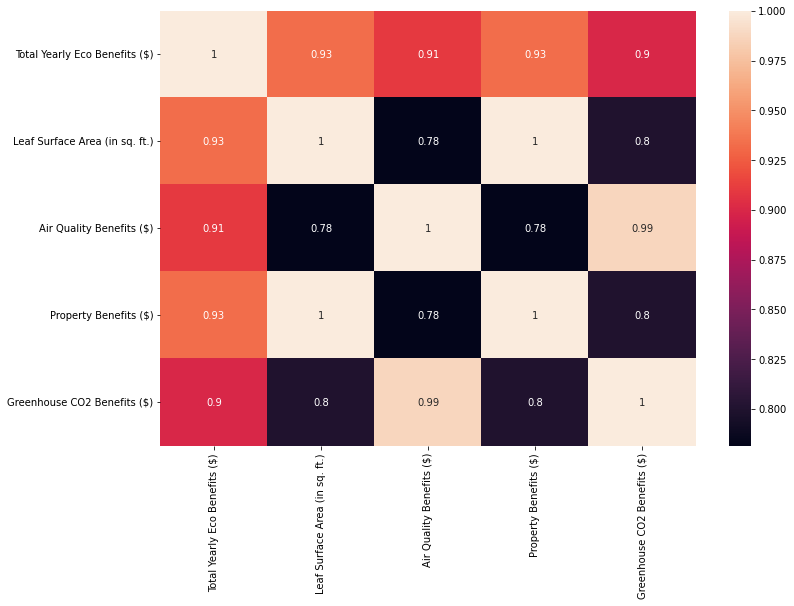

In [52]:
X=data[['Total Yearly Eco Benefits ($)','Leaf Surface Area (in sq. ft.)','Air Quality Benefits ($)','Property Benefits ($)','Greenhouse CO2 Benefits ($)']]
y=data["Target"]
f=plt.figure(figsize=(12,8))
sns.heatmap(X.corr(), annot=True)
plt.show()

In [26]:
X.columns.tolist()

['Total Yearly Eco Benefits ($)',
 'Leaf Surface Area (in sq. ft.)',
 'Air Quality Benefits ($)',
 'Property Benefits ($)',
 'Greenhouse CO2 Benefits ($)']

In [28]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("X_Train Shape",X_train.shape)
print("X_Test Shape",X_test.shape)
print("y_Train Shape",y_train.shape)
print("y_Test Shape",y_test.shape)

X_Train Shape (5104, 5)
X_Test Shape (2188, 5)
y_Train Shape (5104,)
y_Test Shape (2188,)


#Model Building

##Logistic Regression

Logistic Regression Accuracy 0.8912248628884827
[[456   0   0   0   0]
 [  0 460   3   0   0]
 [  8   0 416   5  30]
 [  3   0  16 289  82]
 [ 32   4  50   5 329]]




              precision    recall  f1-score   support

           0       0.91      1.00      0.95       456
           1       0.99      0.99      0.99       463
           2       0.86      0.91      0.88       459
           3       0.97      0.74      0.84       390
           4       0.75      0.78      0.76       420

    accuracy                           0.89      2188
   macro avg       0.90      0.88      0.89      2188
weighted avg       0.90      0.89      0.89      2188



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Figure size 3600x3600 with 0 Axes>

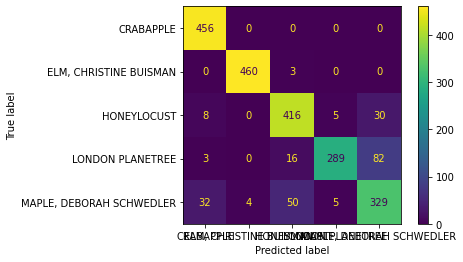




Training score for LogisticRegression: 0.897335
Testing  score for LogisticRegression: 0.891225


In [29]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
lr_Y_pred =logreg.predict(X_test)
print("Logistic Regression Accuracy",metrics.accuracy_score(y_test, lr_Y_pred))
print(confusion_matrix(y_test,lr_Y_pred))
print("\n\n\n")
print(classification_report(y_test,lr_Y_pred))
logreg.score
f=plt.figure(figsize=(50,50))
metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(y_test,lr_Y_pred), display_labels = label).plot()
plt.show()
print("\n\n")
print("Training score for LogisticRegression: %f" % logreg.score(X_train , y_train))
print("Testing  score for LogisticRegression: %f" % logreg.score(X_test, y_test ))

##**SVM**

Support Vector Machine Accuray :  0.9675502742230347
[[456   0   0   0   0]
 [  0 460   3   0   0]
 [  0   0 455   3   1]
 [  3   0   1 385   1]
 [ 22   5  32   0 361]]




              precision    recall  f1-score   support

           0       0.95      1.00      0.97       456
           1       0.99      0.99      0.99       463
           2       0.93      0.99      0.96       459
           3       0.99      0.99      0.99       390
           4       0.99      0.86      0.92       420

    accuracy                           0.97      2188
   macro avg       0.97      0.97      0.97      2188
weighted avg       0.97      0.97      0.97      2188



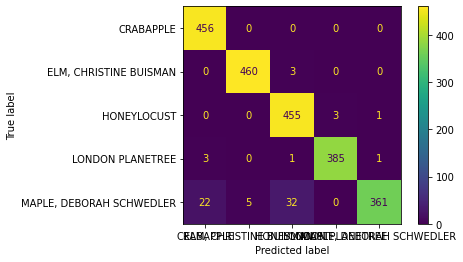




Training set score for SVM: 0.965125
Testing  set score for SVM: 0.967550


In [30]:
svm = SVC()
svm.fit(X_train, y_train)
svm_Y_pred =svm.predict(X_test)
print("Support Vector Machine Accuray : ",metrics.accuracy_score(y_test, svm_Y_pred))
print(confusion_matrix(y_test,svm_Y_pred))
print("\n\n\n")
print(classification_report(y_test,svm_Y_pred))
svm.score
metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(y_test,svm_Y_pred), display_labels = label).plot()
plt.show()
print("\n\n")
print("Training set score for SVM: %f" % svm.score(X_train , y_train))
print("Testing  set score for SVM: %f" % svm.score(X_test, y_test ))

##K NeighborsClassifier

KNeighborsClassifier Accuray :  0.9926873857404022
[[456   0   0   0   0]
 [  0 461   1   0   1]
 [  0   0 459   0   0]
 [  0   0   1 387   2]
 [  5   2   2   2 409]]




              precision    recall  f1-score   support

           0       0.99      1.00      0.99       456
           1       1.00      1.00      1.00       463
           2       0.99      1.00      1.00       459
           3       0.99      0.99      0.99       390
           4       0.99      0.97      0.98       420

    accuracy                           0.99      2188
   macro avg       0.99      0.99      0.99      2188
weighted avg       0.99      0.99      0.99      2188



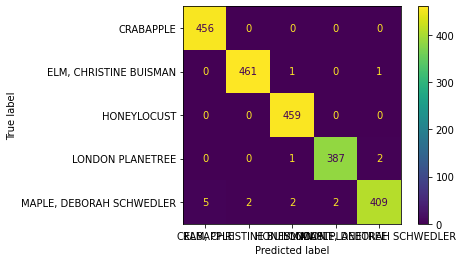




Training set score for KNeighborsClassifier: 0.996277
Testing  set score for KNeighborsClassifier: 0.992687


In [31]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_Y_pred =knn.predict(X_test)
print("KNeighborsClassifier Accuray : ",metrics.accuracy_score(y_test, knn_Y_pred))
print(confusion_matrix(y_test,knn_Y_pred))
print("\n\n\n")
print(classification_report(y_test,knn_Y_pred))
knn.score
metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(y_test,knn_Y_pred), display_labels = label).plot()
plt.show()
print("\n\n")
print("Training set score for KNeighborsClassifier: %f" % knn.score(X_train , y_train))
print("Testing  set score for KNeighborsClassifier: %f" % knn.score(X_test, y_test ))

##RandomForestClassifier

RandomForestClassifier Accuray :  0.9963436928702011
[[454   0   2   0   0]
 [  0 462   0   0   1]
 [  0   0 459   0   0]
 [  0   0   1 388   1]
 [  2   1   0   0 417]]




              precision    recall  f1-score   support

           0       1.00      1.00      1.00       456
           1       1.00      1.00      1.00       463
           2       0.99      1.00      1.00       459
           3       1.00      0.99      1.00       390
           4       1.00      0.99      0.99       420

    accuracy                           1.00      2188
   macro avg       1.00      1.00      1.00      2188
weighted avg       1.00      1.00      1.00      2188



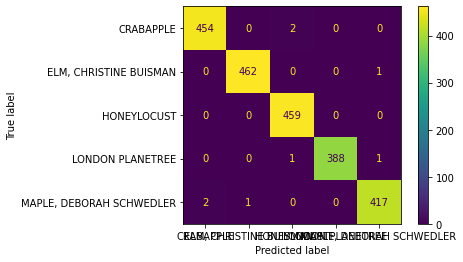




Training score for RandomForestClassifier: 1.000000
Testing score for RandomForestClassifier: 0.996344


In [33]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_Y_pred =rfc.predict(X_test)
print("RandomForestClassifier Accuray : ",metrics.accuracy_score(y_test, rfc_Y_pred))
print(confusion_matrix(y_test,rfc_Y_pred))
print("\n\n\n")
print(classification_report(y_test,rfc_Y_pred))
rfc.score
metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(y_test,rfc_Y_pred), display_labels = label).plot()
plt.show()
print("\n\n")
print("Training score for RandomForestClassifier: %f" % rfc.score(X_train , y_train))
print("Testing score for RandomForestClassifier: %f" % rfc.score(X_test, y_test ))

##XGBooost Classifier

XGBClassifier Accuray :  0.9890310786106032
[[456   0   0   0   0]
 [  0 460   3   0   0]
 [  0   0 457   1   1]
 [  0   0   4 386   0]
 [  8   3   2   2 405]]




              precision    recall  f1-score   support

           0       0.98      1.00      0.99       456
           1       0.99      0.99      0.99       463
           2       0.98      1.00      0.99       459
           3       0.99      0.99      0.99       390
           4       1.00      0.96      0.98       420

    accuracy                           0.99      2188
   macro avg       0.99      0.99      0.99      2188
weighted avg       0.99      0.99      0.99      2188



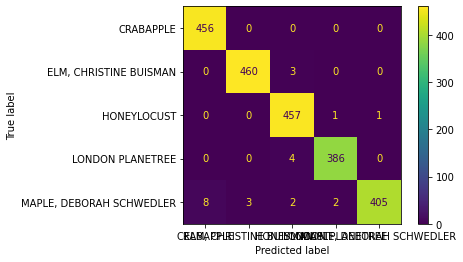




Training set score for XGBClassifier: 0.993143
Testing  set score for XGBClassifier: 0.989031


In [34]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_Y_pred =xgb.predict(X_test)
print("XGBClassifier Accuray : ",metrics.accuracy_score(y_test, xgb_Y_pred))
print(confusion_matrix(y_test,xgb_Y_pred))
print("\n\n\n")
print(classification_report(y_test,xgb_Y_pred))
xgb.score
metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(y_test,xgb_Y_pred), display_labels = label).plot()
plt.show()
print("\n\n")
print("Training set score for XGBClassifier: %f" % xgb.score(X_train , y_train))
print("Testing  set score for XGBClassifier: %f" % xgb.score(X_test, y_test ))

##DecisionTree

XGBClassifier Accuray :  0.996800731261426
[[454   0   2   0   0]
 [  0 462   0   0   1]
 [  0   0 459   0   0]
 [  0   0   0 389   1]
 [  2   1   0   0 417]]




              precision    recall  f1-score   support

           0       1.00      1.00      1.00       456
           1       1.00      1.00      1.00       463
           2       1.00      1.00      1.00       459
           3       1.00      1.00      1.00       390
           4       1.00      0.99      0.99       420

    accuracy                           1.00      2188
   macro avg       1.00      1.00      1.00      2188
weighted avg       1.00      1.00      1.00      2188



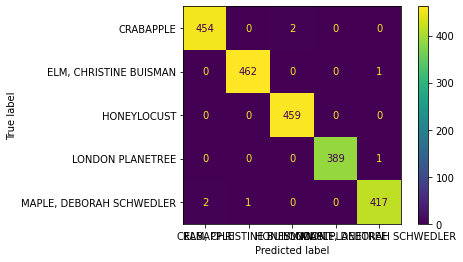




Training set score for DecisionTreeClassifier: 0.993143
Testing  set score for DecisionTreeClassifier: 0.989031


In [35]:
DT =DecisionTreeClassifier()
DT.fit(X_train, y_train)
DT_Y_pred =DT.predict(X_test)
print("XGBClassifier Accuray : ",metrics.accuracy_score(y_test, DT_Y_pred))
print(confusion_matrix(y_test,DT_Y_pred))
print("\n\n\n")
print(classification_report(y_test,DT_Y_pred))
DT.score
metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(y_test,DT_Y_pred), display_labels = label).plot()
plt.show()
print("\n\n")
print("Training set score for DecisionTreeClassifier: %f" % xgb.score(X_train , y_train))
print("Testing  set score for DecisionTreeClassifier: %f" % xgb.score(X_test, y_test ))

#Gird Search CV


##SVM

In [36]:
# #Libraries to Build Ensemble Model : Random Forest Classifier 
# # Create the parameter grid based on the results of random search 
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [37]:
svm_model = GridSearchCV(SVC(), params_grid, cv=5)
svm_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])

In [38]:
print(svm_model.best_params_)
final_model = svm_model.best_estimator_
Y_pred = final_model.predict(X_test)


{'C': 1000, 'kernel': 'linear'}


In [39]:
print(confusion_matrix(y_test,Y_pred))
print("\n\n\n")
print(classification_report(y_test,Y_pred))
svm_model.score


[[455   0   1   0   0]
 [  0 463   0   0   0]
 [  8   0 442   9   0]
 [  0   0   6 378   6]
 [  3   3   0   0 414]]




              precision    recall  f1-score   support

           0       0.98      1.00      0.99       456
           1       0.99      1.00      1.00       463
           2       0.98      0.96      0.97       459
           3       0.98      0.97      0.97       390
           4       0.99      0.99      0.99       420

    accuracy                           0.98      2188
   macro avg       0.98      0.98      0.98      2188
weighted avg       0.98      0.98      0.98      2188



<bound method BaseSearchCV.score of GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])>

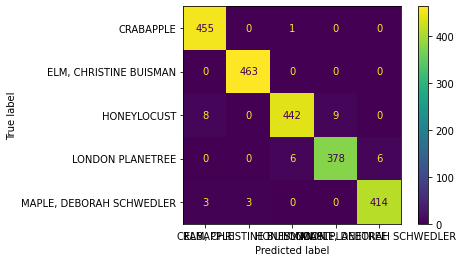




Training set score for SVM: 0.982759
Testing  set score for SVM: 0.983547


In [40]:
metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(y_test,Y_pred), display_labels = label).plot()
plt.show()
print("\n\n")
print("Training set score for SVM: %f" % final_model.score(X_train , y_train))
print("Testing  set score for SVM: %f" % final_model.score(X_test, y_test ))

##RandomForest

In [41]:
rfc=RandomForestClassifier(random_state=42)

In [42]:
param_grid = { 
    'n_estimators': [64, 128, 256],
    'max_depth' : [2, 8, 16],
   }

In [55]:
import timeit

start = timeit.default_timer()

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

stop = timeit.default_timer()

print('Required Time: ', stop - start, 'seconds') 


Required Time:  25.652478587999667 seconds


In [44]:
from pandas.core.groupby.groupby import final
print(CV_rfc.best_params_)
final_model = CV_rfc.best_estimator_
Y_pred = final_model.predict(X_test)
print(confusion_matrix(y_test,Y_pred))
print("\n\n\n")
print(classification_report(y_test,Y_pred))
final_model.score

{'max_depth': 16, 'n_estimators': 64}
[[454   0   2   0   0]
 [  0 462   0   0   1]
 [  0   0 459   0   0]
 [  0   0   1 388   1]
 [  2   1   0   0 417]]




              precision    recall  f1-score   support

           0       1.00      1.00      1.00       456
           1       1.00      1.00      1.00       463
           2       0.99      1.00      1.00       459
           3       1.00      0.99      1.00       390
           4       1.00      0.99      0.99       420

    accuracy                           1.00      2188
   macro avg       1.00      1.00      1.00      2188
weighted avg       1.00      1.00      1.00      2188



<bound method ClassifierMixin.score of RandomForestClassifier(max_depth=16, n_estimators=64, random_state=42)>

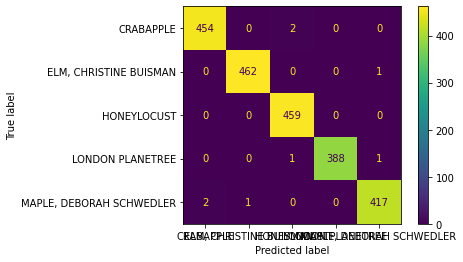




Training set score for RandomForestClassifier: 100.000000 %
Testing  set score for RandomForestClassifier: 99.634369 %
Required Time:  25.652478587999667 seconds


In [58]:
metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(y_test,Y_pred), display_labels = label).plot()
plt.show()
print("\n\n")
print("Training set score for RandomForestClassifier: %f" % (final_model.score(X_train , y_train)*100),'%')
print("Testing  set score for RandomForestClassifier: %f" % (final_model.score(X_test, y_test)*100),'%')
print('Required Time: ', stop - start, 'seconds') 